
# **Content**

## Regression

* [Linear Regression](#1.)
* [Multiple Linear Regression](#2.)
* [Polynomial Linear Regression](#3.)
* [Support Vector Regression](#4.)
* [Decision Tree Regression](#5.)
* [Random Forest Regression](#6.)

## Classification

* [K-Nearest Neighbour (KNN) Classification](#7.)
* [Support Vector Machine (SVM) Classification](#8.)
* [Naive Bayes Classification](#9.)
* [Decision Tree Classification](#10.)
* [Random Forest Classification](#11.)


* [Conclusion](#12.)














# Regression
<a class="anchor" id="1."></a> 
# Linear Regression



In [69]:

import pandas as pd
import matplotlib.pyplot as plt
import math

data = pd.read_csv("/kaggle/input/supervised/auto.csv")


In [99]:

data.head()


,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,0,15.0
1,9.0,304.0,193,4732,18.5,0,20.0
2,36.1,91.0,60,1800,16.4,1,10.0
3,18.5,250.0,98,3525,19.0,0,15.0
4,34.3,97.0,78,2188,15.8,0,10.0


In [100]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 7 columns):
mpg       392 non-null float64
displ     392 non-null float64
hp        392 non-null int64
weight    392 non-null int64
accel     392 non-null float64
origin    392 non-null int64
size      392 non-null float64
dtypes: float64(4), int64(3)
memory usage: 21.5 KB


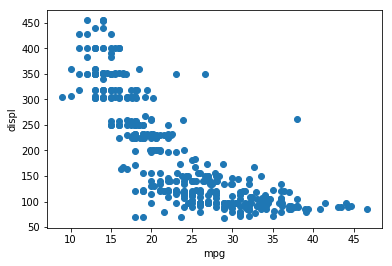

In [116]:

plt.scatter(data.mpg,data.displ)
plt.xlabel("mpg")
plt.ylabel("displ")
plt.show()

In [104]:
#%% linear regression

# sklearn library
from sklearn.linear_model import LinearRegression
# linear regression model
linear_reg = LinearRegression()

x = data.mpg.values.reshape(-1,1)
y = data.displ.values.reshape(-1,1)

linear_reg.fit(x,y)

print('R sq: ', linear_reg.score(x, y))
print('Correlation: ', math.sqrt(linear_reg.score(x, y)))

R sq:  0.6482294003193043
Correlation:  0.8051269467104578


In [106]:
#%% prediction
import numpy as np

print("Coefficient for X: ", linear_reg.coef_)
print("Intercept for X: ", linear_reg.intercept_)
print("Regression line is: y = " + str(linear_reg.intercept_[0]) + " + (x * " + str(linear_reg.coef_[0][0]) + ")")

# mpg = 1663 + 1138*displ 
mpg_new = 1663 + 1138*11
print(mpg_new)

array = np.array([11]).reshape(-1,1)
print(linear_reg.predict(array))

Coefficient for X:  [[-10.79457099]]
Intercept for X:  [447.50061994]
Regression line is: y = 447.5006199402195 + (x * -10.794570985829964)
14181
[[328.7603391]]


array([[-631.95647864]])

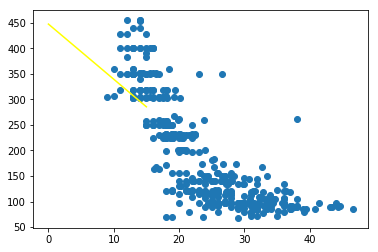

In [107]:
# visualize line
array = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]).reshape(-1,1)  # 

plt.scatter(x,y)
#plt.show()
y_head = linear_reg.predict(array)  #mpg
plt.plot(array, y_head,color = "yellow")
array = np.array([100]).reshape(-1,1)
linear_reg.predict(array)

In [108]:
y_head = linear_reg.predict(x)  # maas
from sklearn.metrics import r2_score
print("r_square score: ", r2_score(y,y_head))

r_square score:  0.6482294003193043



<a class="anchor" id="2."></a> 
# Multiple Linear Regression

In [118]:
x = data.iloc[:,[0,1]].values
y = data.displ.values.reshape(-1,1)

multiple_linear_regression = LinearRegression()
multiple_linear_regression.fit(x,y)

print("b0: ",multiple_linear_regression.intercept_)
print("b1: ", multiple_linear_regression.coef_)

#predict
x_ = np.array([[10,35],[5,35]])
multiple_linear_regression.predict(x_)

y_head = multiple_linear_regression.predict(x) 
from sklearn.metrics import r2_score
print("r_square score: ", r2_score(y,y_head))

b0:  [0.]
b1:  [[3.82949086e-16 1.00000000e+00]]
r_square score:  1.0



<a class="anchor" id="3."></a> 
# Polynomial Linear Regression

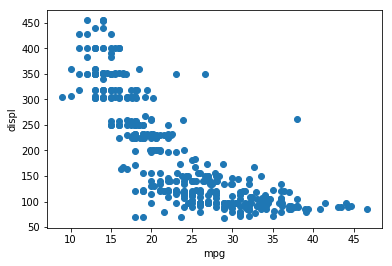

In [119]:
x = data['mpg'].values.reshape(-1, 1)
y = data['displ'].values.reshape(-1, 1)

plt.scatter(x,y)
plt.xlabel("mpg")
plt.ylabel("displ")
plt.show()

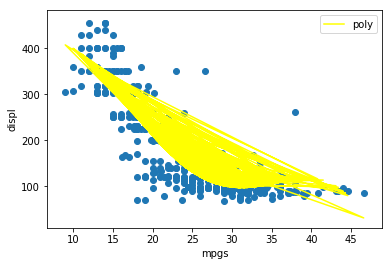

r_square score:  0.7915436701292714


In [128]:
# polynomial regression =  y = b0 + b1*x +b2*x^2 + b3*x^3 + ... + bn*x^n
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

polynominal_regression = PolynomialFeatures(degree=4)
x_polynomial = polynominal_regression.fit_transform(x,y)

# %% fit
linear_regression = LinearRegression()
linear_regression.fit(x_polynomial,y)
# %%
y_head2 = linear_regression.predict(x_polynomial)

plt.plot(x,y_head2,color= "yellow",label = "poly")
plt.legend()
plt.scatter(x,y)
plt.xlabel("mpgs")
plt.ylabel("displ")
plt.show()

from sklearn.metrics import r2_score
print("r_square score: ", r2_score(y,y_head2))




<a class="anchor" id="4."></a> 
# Support Vector Regression

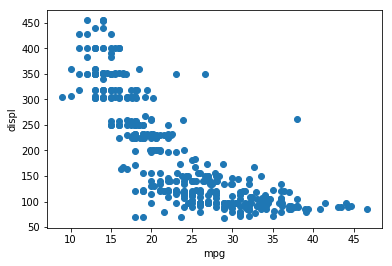

In [124]:
x = data['mpg'].values.reshape(-1, 1)
y = data['displ'].values.reshape(-1, 1)

plt.scatter(x,y)
plt.xlabel("mpg")
plt.ylabel("displ")
plt.show()

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:747: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


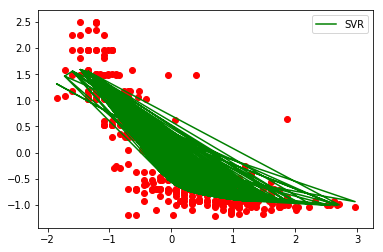

R sq:  0.7998419006360877


In [129]:

from sklearn.preprocessing import StandardScaler
sc1 = StandardScaler()
x_pred = sc1.fit_transform(x)
sc2 = StandardScaler()
y_pred = sc2.fit_transform(y)

#%% SVR
from sklearn.svm import SVR

svr_reg = SVR(kernel = 'rbf')
svr_reg.fit(x_pred,y_pred)

y_head = svr_reg.predict(x_pred)

# visualize line
plt.plot(x_pred,y_head,color= "green",label = "SVR")
plt.legend()
plt.scatter(x_pred,y_pred,color='red')
plt.show()

print('R sq: ', svr_reg.score(x_pred, y_pred))


<a class="anchor" id="5."></a> 
# Decision Tree Regression

In [130]:
x = data.iloc[:,[0]].values.reshape(-1,1)
y = data.iloc[:,[1]].values.reshape(-1,1)

In [131]:
#%%  decision tree regression
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(x,y)

print(tree_reg.predict(np.array([5.5]).reshape(-1,1)))

[304.]


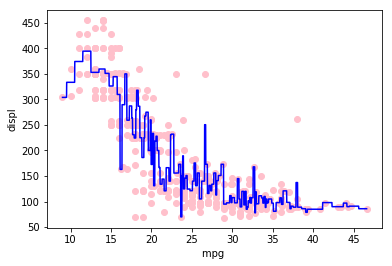

r_square score:  0.8596883909319628


In [133]:
x_ = np.arange(min(x),max(x),0.01).reshape(-1,1)
#print(x)
y_head = tree_reg.predict(x_)
#print(y_head)

# %% visualize
plt.scatter(x,y,color="pink")
plt.plot(x_,y_head,color = "blue")
plt.xlabel("mpg ")
plt.ylabel("displ")
plt.show()

y_head = tree_reg.predict(x)
#from sklearn.metrics import r2_score
print("r_square score: ", r2_score(y,y_head))


<a class="anchor" id="6."></a> 
# Random Forest Regression

In [134]:
x = data.iloc[:,0].values.reshape(-1,1)
y = data.iloc[:,1].values.reshape(-1,1)

In [135]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, random_state= 42) 
rf.fit(x,y)

print("score: ",rf.predict(np.array([7.8]).reshape(-1,1)))

x_ = np.arange(min(x),max(x),0.01).reshape(-1,1)
y_head = rf.predict(x_)

score:  [309.86633333]


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


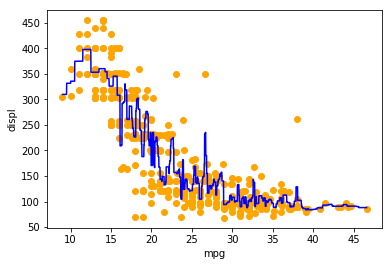

In [136]:
# visualize
plt.scatter(x,y,color="orange")
plt.plot(x_,y_head,color="blue")
plt.xlabel("mpg")
plt.ylabel("displ")
plt.show()

In [145]:
y_head = rf.predict(x)
from sklearn.metrics import r2_score
print("r_score: ", r2_score(y,y_head))

r_score:  0.8555035801331566


# Classification
<a class="anchor" id="7."></a> 
# K-Nearest Neighbour (KNN) Classification

In [146]:


data.tail()


,mpg,displ,hp,weight,accel,origin,size
387,18.0,250.0,88,3021,16.5,0,15.0
388,27.0,151.0,90,2950,17.3,0,10.0
389,29.5,98.0,68,2135,16.6,1,10.0
390,17.5,250.0,110,3520,16.4,0,15.0
391,25.1,140.0,88,2720,15.4,0,10.0


In [153]:

data2 = pd.read_csv("/kaggle/input/supervised/auto.csv")

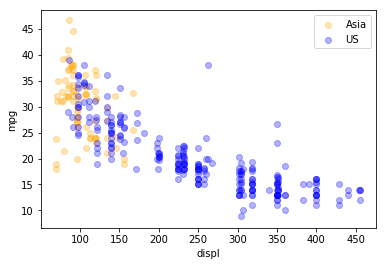

In [154]:
A = data2[data2.origin == "Asia"]
US = data2[data2.origin == "US"]
# scatter plot
plt.scatter(A.displ,A.mpg,color="orange",label="Asia",alpha= 0.3)
plt.scatter(US.displ,US.mpg,color="blue",label="US",alpha= 0.3)
plt.xlabel("displ")
plt.ylabel("mpg")
plt.legend()
plt.show()

In [155]:
# %%
data2.origin = [1 if each == "Asia" else 0 for each in data2.origin]
y = data2.origin.values
x_data = data2.drop(["origin"],axis=1)
# %%
# normalization 
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [156]:
#%%
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=1)

# %%
# knn model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3) # n_neighbors = k
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print(" {}NN score: {} ".format(3,knn.score(x_test,y_test)))

 3NN score: 0.8305084745762712 


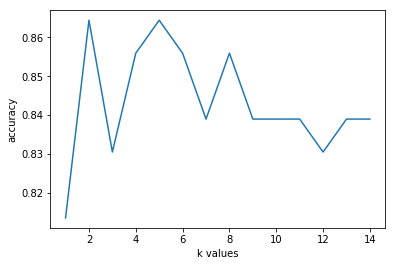

In [82]:
# %%
# find k value
score_list = []
for each in range(1,15):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))
    
plt.plot(range(1,15),score_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()

In [83]:
# %%
# knn model
knn = KNeighborsClassifier(n_neighbors = 8) # n_neighbors = k
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print(" {} nn score: {} ".format(3,knn.score(x_test,y_test)))

 3 nn score: 0.8559322033898306 


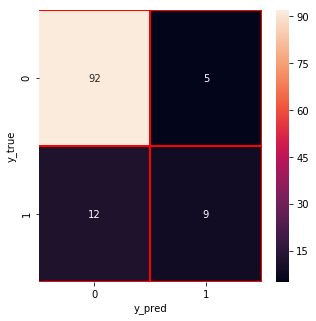

In [84]:
#%% confusion matrix
y_pred = knn.predict(x_test)
y_true = y_test
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true,y_pred)

# %% cm visualization
import seaborn as sns

f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


<a class="anchor" id="8."></a> 
# Support Vector Machine (SVM) Classification

In [97]:
#%%
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=1)

# %% SVM
from sklearn.svm import SVC
 
svm = SVC(random_state = 1)
svm.fit(x_train,y_train)
# %% test
print("print accuracy of svm algorithim: ",svm.score(x_test,y_test))



print accuracy of svm algorithim:  0.8220338983050848


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


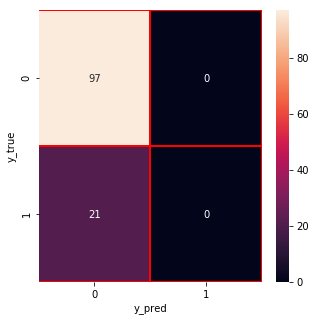

In [89]:
#%% confusion matrix
y_pred = svm.predict(x_test)
y_true = y_test
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true,y_pred)

# %% cm visualization
import seaborn as sns

f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


<a class="anchor" id="9."></a> 
# Naive Bayes Classification

In [96]:
#%%
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=1)

# %% Naive bayes 
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)

nb.score(x_test,y_test)
 # %% test
print("print accuracy of naive bayes algorithim: ",nb.score(x_test,y_test))

print accuracy of naive bayes algorithim:  0.6440677966101694


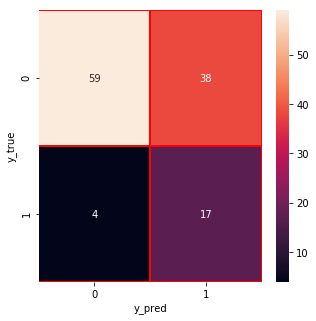

In [91]:
#%% confusion matrix
y_pred = nb.predict(x_test)
y_true = y_test
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true,y_pred)

# %% cm visualization
import seaborn as sns

f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


<a class="anchor" id="10."></a> 
# Decision Tree Classification

In [92]:
# %% train test split
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size = 0.15,random_state = 42)

#%%
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

print("score: ", dt.score(x_test,y_test))

score:  0.8983050847457628


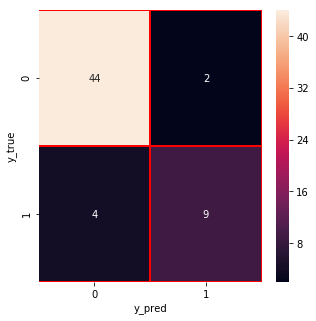

In [93]:
#%% confusion matrix
y_pred = dt.predict(x_test)
y_true = y_test
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true,y_pred)

# %% cm visualization
import seaborn as sns

f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


<a class="anchor" id="11."></a> 
# Random Forest Classification

In [95]:
# %% train test split
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size = 0.15,random_state = 42)

#%%  random forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100,random_state = 1)
rf.fit(x_train,y_train)
print("random forest algorithim result: ",rf.score(x_test,y_test))

random forest algorithim result:  0.9491525423728814


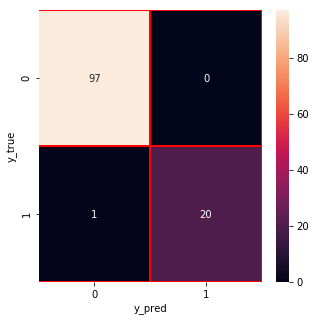

In [98]:
#%% confusion matrix
y_pred = rf.predict(x_test)
y_true = y_test
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true,y_pred)

# %% cm visualization
import seaborn as sns

f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


<a class="anchor" id="12."></a> 
# Conclusion

# Regression:
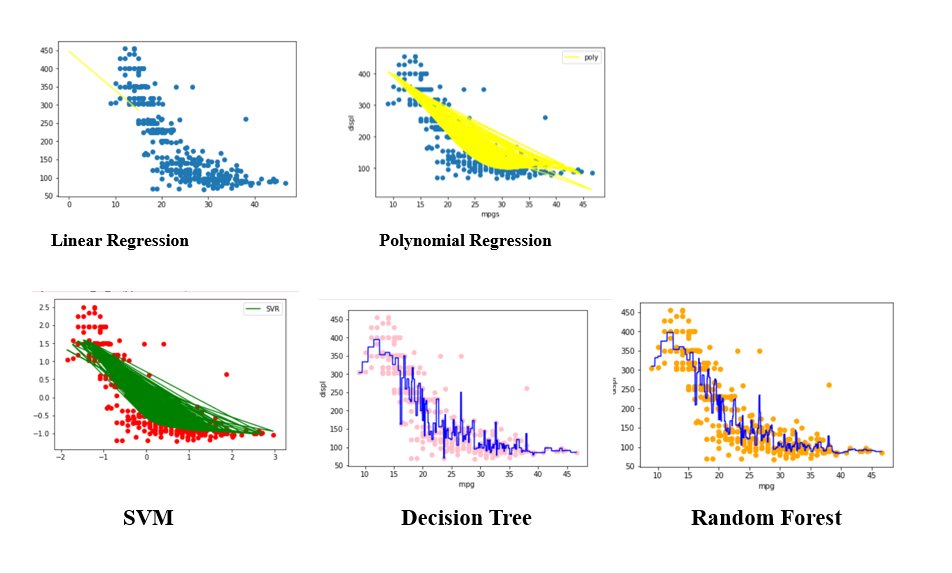

# Classification:
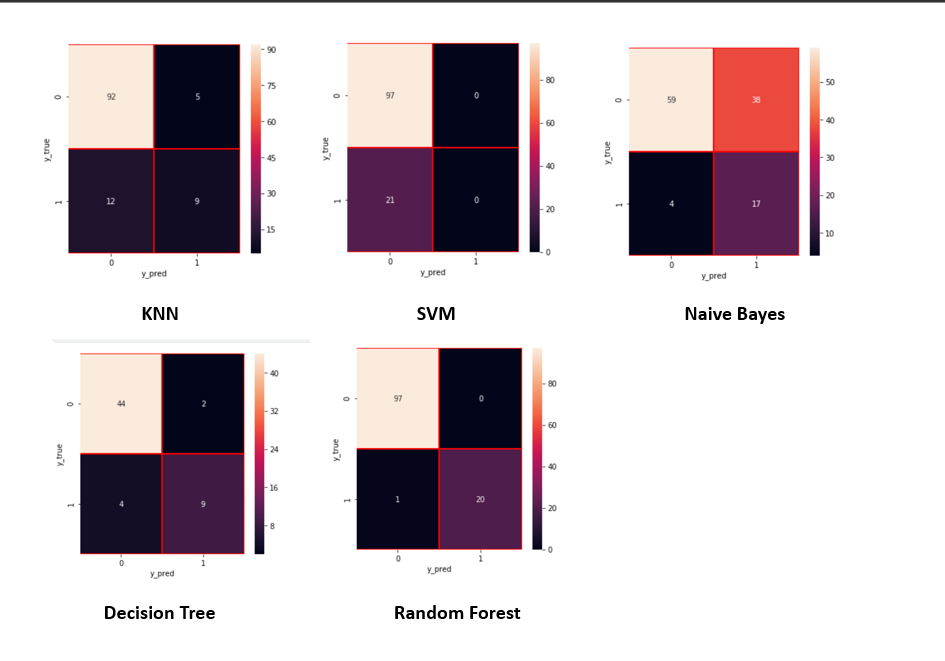
